In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix


In [116]:
df = pd.read_csv('/content/Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [118]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [119]:
df.isnull().sum()

,0
age,0
gender,0
impluse,0
pressurehight,0
pressurelow,0
glucose,0
kcm,0
troponin,0
class,0


In [120]:
df['gender'].unique()

array([1, 0])

In [121]:
df['class'].unique()

array(['negative', 'positive'], dtype=object)

In [122]:
df.rename(columns= {'impluse': 'impulse', 'pressurehight' : 'systolic_bp', 'pressurelow' : 'diastolic_bp'},inplace = True)
df.head()

,age,gender,impulse,systolic_bp,diastolic_bp,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


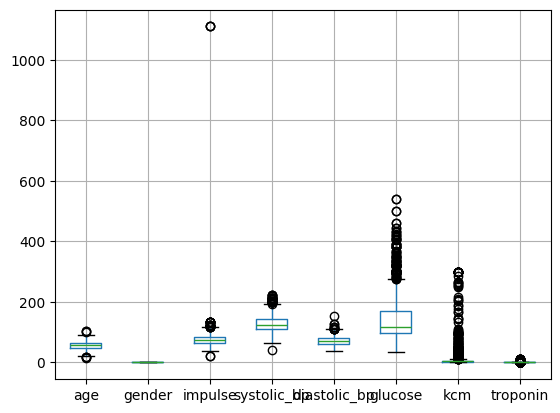

In [123]:
boxplot = df.boxplot()

In [124]:
#Handling Outliers in impulse column
df = df[(df['impulse'] >= 30) & (df['impulse'] <= 220)]

In [125]:
df['impulse'].max()

135

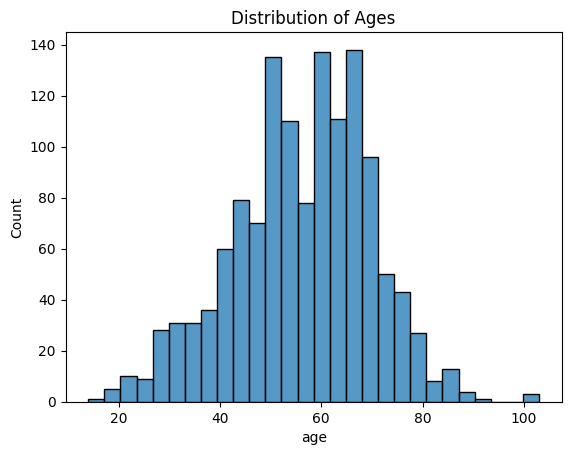

In [126]:
sns.histplot(data=df, x="age")
plt.title("Distribution of Ages")
plt.show()

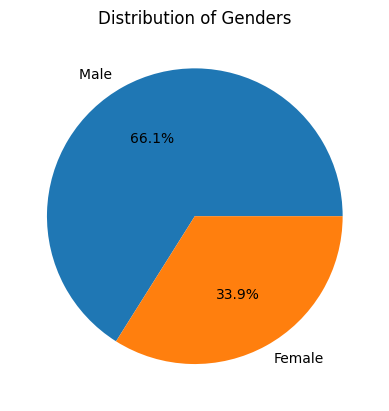

In [127]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

gender_class = { 1: 'Male ',
                 0 : 'Female'
                }

gender_counts.index = gender_counts.index.map(gender_class)
# Create the pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%') #'(%1.1f%%') formats the percentage to one decimal place.
plt.title('Distribution of Genders')
plt.show()

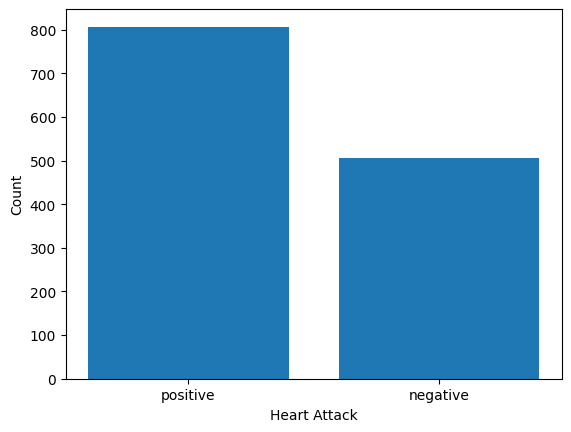

In [128]:
class_counts = df['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Heart Attack')
plt.ylabel('Count')
plt.show()

##Data Processing

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [131]:
df['pulse_pressure'] = df['systolic_bp'] - df['diastolic_bp']

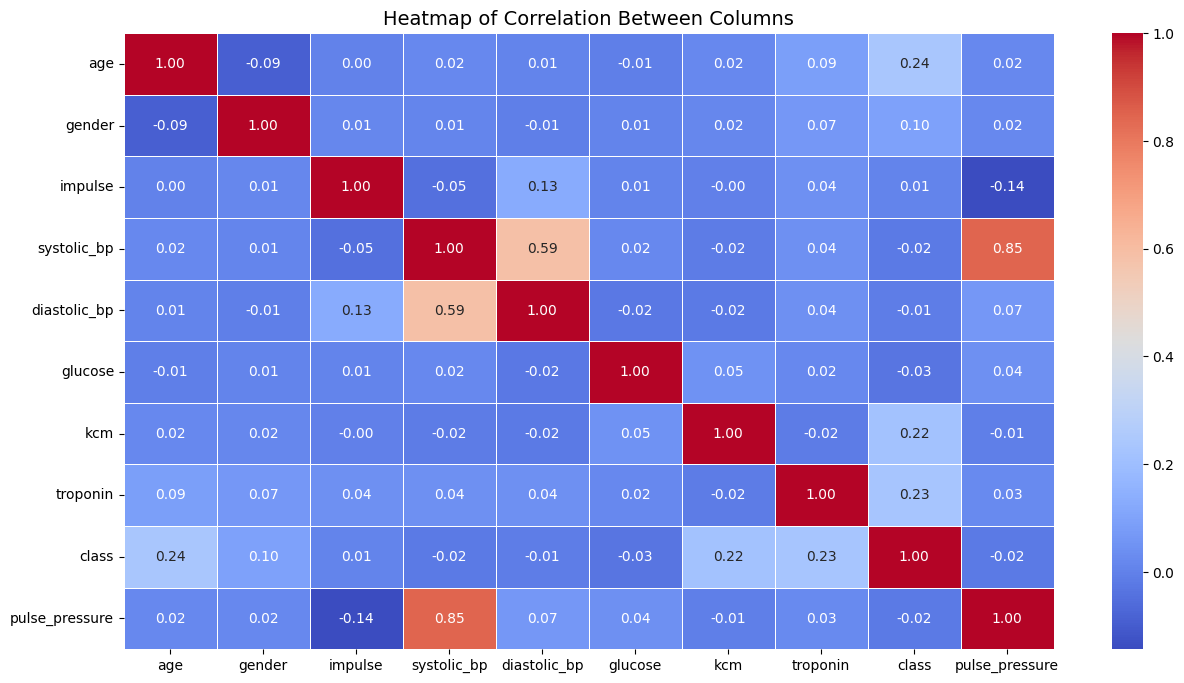

In [132]:
corr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Between Columns", fontsize=14)
plt.show()

In [133]:
df.columns

Index(['age', 'gender', 'impulse', 'systolic_bp', 'diastolic_bp', 'glucose',
       'kcm', 'troponin', 'class', 'pulse_pressure'],
      dtype='object')

##Split X (Features) and Y (Target) columns into 80/20 split


In [134]:
X = df.drop('class', axis=1)
y = df['class']

In [135]:
#Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
 )

##Applying Logistic Regression

In [137]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

##Predicting the test set

In [138]:
y_pred_test = clf.predict(X_test)

##Model Evaluation

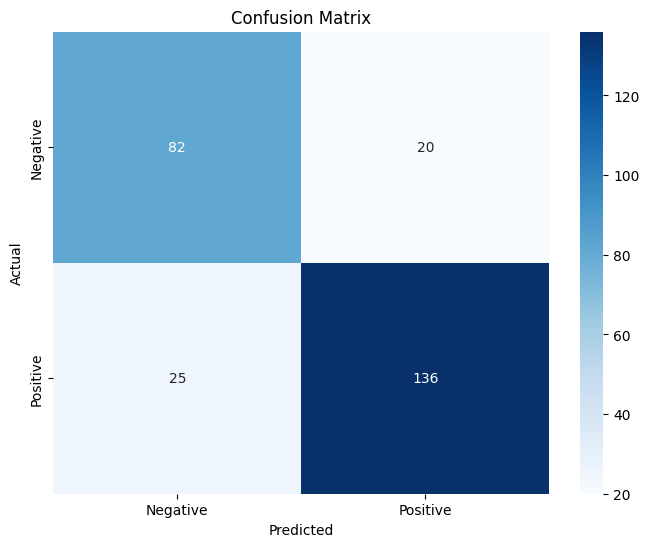

In [139]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Class names
class_names = ["Negative", "Positive", ]

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [140]:
from sklearn import metrics
accuracy_lr = metrics.accuracy_score(y_test, y_pred_test)
print(accuracy_lr)

0.8288973384030418


In [141]:
from sklearn.metrics import classification_report
report_lr = classification_report(y_test, y_pred_test, target_names=["Negative","Positive"])
print(report_lr)


              precision    recall  f1-score   support

    Negative       0.77      0.80      0.78       102
    Positive       0.87      0.84      0.86       161

    accuracy                           0.83       263
   macro avg       0.82      0.82      0.82       263
weighted avg       0.83      0.83      0.83       263



Precision for positive : Percent of correctly predicited true positive ( who actually have heart attack) in all positively predicted values.

Recall positive : Percent of correctly predict as true Positive out of all actual positive patients
“Out of all patients who truly have a heart attack, the percent that the model correctly predicted as Positive.”


Macro avg = 0.80, meaning the model performs similarly across classes (balanced , not biased towards a specific class)

Weighted avg : The model’s overall effectiveness, considering that more patients were Positive (161 vs. 102).

In [142]:
from sklearn.svm import SVC
def evaluate_svm(kernel_type, X_train, y_train, X_test, y_test):
    svm = SVC(kernel=kernel_type, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\nSVM with {kernel_type} kernel:")
    print(f"Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for {kernel_type}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("Classification Report:")
    print(report)
    return svm, accuracy



SVM with linear kernel:
Accuracy: 0.8099


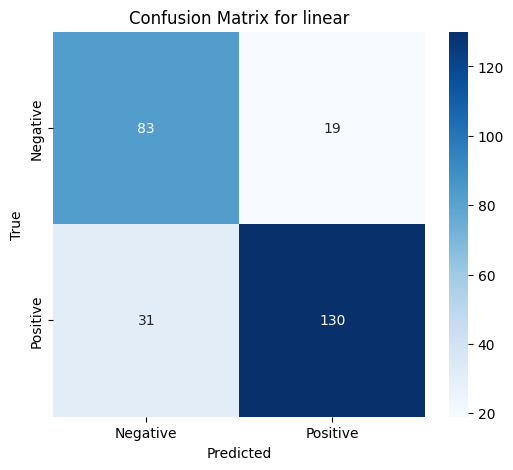

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       102
           1       0.87      0.81      0.84       161

    accuracy                           0.81       263
   macro avg       0.80      0.81      0.80       263
weighted avg       0.82      0.81      0.81       263


SVM with poly kernel:
Accuracy: 0.6996


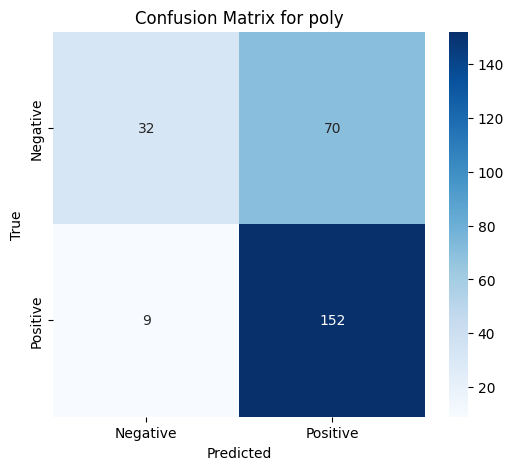

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.31      0.45       102
           1       0.68      0.94      0.79       161

    accuracy                           0.70       263
   macro avg       0.73      0.63      0.62       263
weighted avg       0.72      0.70      0.66       263


SVM with rbf kernel:
Accuracy: 0.7643


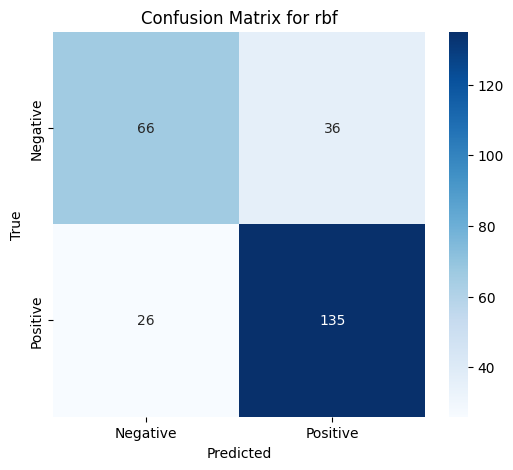

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       102
           1       0.79      0.84      0.81       161

    accuracy                           0.76       263
   macro avg       0.75      0.74      0.75       263
weighted avg       0.76      0.76      0.76       263



In [143]:
kernels = ['linear', 'poly', 'rbf']
svm_results = {}

for kernel in kernels:
    model, acc = evaluate_svm(kernel, X_train, y_train, X_test, y_test)
    svm_results[kernel] = {'model': model, 'accuracy': acc}

In [144]:
# Find best SVM kernel
best_svm_kernel = max(svm_results, key=lambda k: svm_results[k]['accuracy'])
best_svm_acc = svm_results[best_svm_kernel]['accuracy']
print(f"\nBest performing kernel in SVM : {best_svm_kernel} with accuracy {best_svm_acc}")


Best performing kernel in SVM : linear with accuracy 0.8098859315589354


In [145]:
#Testing best model in SVM into the test set
svm_best = SVC(kernel=best_svm_kernel, C=1.0, random_state=42)
svm_best.fit(X_train, y_train)
best_svm_y_pred = svm_best.predict(X_test)

# Calculate performance metrics for SVM
svm_accuracy = accuracy_score(y_test, best_svm_y_pred)
svm_report = classification_report(y_test, best_svm_y_pred)

##Comparing best SVM kernel with Logistic Regression

In [146]:
#Comparing best SVM kernel with Logistic Regression
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Best SVM ({best_svm_kernel}) Accuracy: {svm_accuracy:.4f}")

if svm_accuracy > accuracy_lr :
    print(f"Best SVM ({best_svm_kernel}) performed better than Logistic Regression.")
elif svm_accuracy < accuracy_lr :
    print("Logistic Regression performed better than Best SVM.")
else:
    print("Both models performed equally well.")

Logistic Regression Accuracy: 0.8289
Best SVM (linear) Accuracy: 0.8099
Logistic Regression performed better than Best SVM.


In [147]:
print(f"Logistic Regression Classification Report:\n {report_lr}")
print(f"Best SVM ({best_svm_kernel}) Classification Report:\n {svm_report}")

Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.80      0.78       102
    Positive       0.87      0.84      0.86       161

    accuracy                           0.83       263
   macro avg       0.82      0.82      0.82       263
weighted avg       0.83      0.83      0.83       263

Best SVM (linear) Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       102
           1       0.87      0.81      0.84       161

    accuracy                           0.81       263
   macro avg       0.80      0.81      0.80       263
weighted avg       0.82      0.81      0.81       263

